# Eksempel på bruk av koding for et strikkhopp #
Date: **16.12.2016**

Vi skal se på hvordan vi bruker koding for å modellere et strikkhopp. 

Vi trenger:
* enkel programmering (koding)
* bevegelseslikningene
* Newtons 2e lov. 


## Modellen
Vi skal bruke bevegelseslikningene for å modellere et strikkhopp.

$$
\begin{eqnarray}
v &=& v_0 t \tag{1}\\
x &=& x_0 + v_0 t + \frac{1}{2}a(x_0, v_0) t^2\tag{2}
\end{eqnarray}
$$

* Her er $x_0$, $v_0$ og $a$ posisjonen, farten og akselerasjonen til strikhopperen ved starten av tiden. 
* Disse likningene er bare gyldige når akselerasjonen er konstant men under et strikkhopp er den ikke det! 
* Akselerasjonen $a(x_0, v_0)$ er avhengig av $x_0$ og $v_0$. 
* Hvis vi lar $t$ være litet kan vi anta at $a$ er konstant.


## Numerisk metode ##
Isteden for å finne en funksjon, $x(t)$ for posisjonen og en funksjon $v(t)$ for farten bruker vi en numeriske metode hvor vi finner verdien til $x$ og $v$ på enkelte punkter i tid. 
* Vi kommer altså å få en liste med verdier som representerer $x$ og $v$ ved bestemte tidspunkt. 
* Posisjonen og farten i tidssteg $i$ skriver vi: $x[i]$ og $v[i]$.
![Lister](lister.svg)

Vi bruker bevegelseslikningene sammen med verdien til posisjonen $x[i]$ og farten $v[i]$ i starten av tidssteget til å finne posisjonen, $x[i+1]$ og farten, $v[i+1]$ i sluttet av tidssteget slik:

$$
\begin{eqnarray}
v[i+1] &=& v[i] + a(x[i], v[i]) \Delta t\tag{3}\\
x[i+1] &=& x[i] + v[i]\Delta t + \frac{1}{2}a(x[i], v[i]) \Delta t^2\tag{4}
\end{eqnarray}
$$

Legg merke til at vi ikke skriver $t$ for tiden men heller størrelsen på tidssteget $\Delta t$. 
Dette finner vi gjennom å dele inn tidsintervallet $t \in [0, T]$ i $N$ like store deler:

$$ \Delta t = \frac{T}{N}$$

Legg også merke til at vi ikke har en liste for akselerasjonen. Vi bruker heller en funksjon som er avhengig av $x[i]$ og $v[i]$.

## Akselerasjonen ##
Akselerasjonen finner vi fra Newtons 2e lov:
$$
\begin{equation}
\sum F = m\cdot a \tag{3}
\end{equation}
$$

$$
\begin{equation} 
a = \frac{\sum F}{m}
\tag{4}
\end{equation}
$$

Summen av kreftene $\sum F$ er i dette tilfellet lik 

* gravitasjonen, $G=m\cdot g$ hvor $m$ er massen til personen og $g$ tyngdens akselerasjon
* luftmotstandet $L(v)=-D\cdot v$ hvor $v$ er hastigheten og $D$ en luftmotstandskonstant
* strikkraften, $S(x)=-k\cdot x$ hvor $x$ er posisjonen og $k$ er en fjærkonstant (strikkonstant) MEN når strikken er slak er S = 0! Strkken er slak når (strikkstart - x) <  lengden på strikken. 


<p>Krefter som virker på vår strikkhopper</p>

![Krefter](strikkhopp.svg)

Vi har altså at akselerasjonen er gitt ved:

$$
a = \frac{\sum F}{m} = \frac{S(x) - G + L(v)}{m} = \frac{S(x)}{m}-\frac{m\cdot g}{m}+\frac{-D\cdot v}{m} = \frac{S(x)}{m} - g + \frac{-D\cdot v}{m}
$$
I tillegg sier vi at hvis strikken er slak skal $S = 0$.


## Krasjkurs i koding ##
Før vi kaster oss over koden for strikkhopperen må vi lære oss litt enkel Python [koding](koding.ipynb).

## Kode for strikkhopperen ##


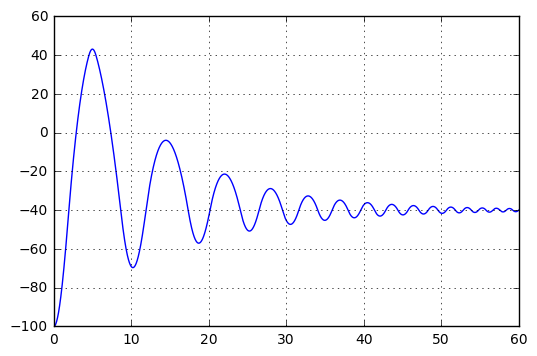

In [36]:
# Inline plotting inne i jupyter!
%matplotlib inline

# Importerer numeriske metoder vi trenger
from pylab import *

# Parametrar
v0 = 0.0    # Utgangsfart
x0 = -100     # Utgangshøyde
s0 = 0.0    # Strikkfeste
            
m  = 80.    # Masse
g  = 9.81   # Tyngdens akselerasjon
k  = 40     # Strikkonstanten
D  = 10     # Luftmotstandskonstant
sL = 40     # Strikklengde

dt = 1e-3   # Tidssteg
T  = 60  # Hvor lenge skall simuleringen vare?
N = int(ceil(T/dt)) # Lengde på liste 

# Initialiserer lister av tall som skall ha løsningene. Merk N+1!
v = zeros(N+1)
x = zeros(N+1)
t = zeros(N+1)

# Setter første elementet i listene til utgangsfarten og utgangshøyden 
v[0] = v0
x[0] = x0
t[0] = 0.0  # Er dette nødvendig?

# Funksjon som regner ut strikkraften
def S(x):
    # Ikke noen kraft hvis strikken er slak!
    if abs(s0 - x) < sL:
        return 0
    else:
        return -k*x

# Funksjon som regner ut akselerasjonen.
def a(x, v):
    return S(x)/m - g - D*v/m

# Algoritmen for å løse for hvert tidssteg
for i in range(N):
    t[i+1] = dt*i
    v[i+1] = v[i] + a(x[i], v[i])*dt
    x[i+1] = x[i] + v[i]*dt + 0.5*a(x[i], v[i])*dt**2

# Plotter posisjonen
plot(t, x)
grid()
show()